# Imports & Configs

In [ ]:
# %pip install numpy pandas seaborn matplotlib optuna sklearn xgboost catboost lightgbm > /dev/null 2>&1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
# from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
from tabulate import tabulate
import os
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

/home/ahmed/python-venv/TF-Machine-Learning/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Preprocessing & EDA

In [2]:
train=pd.read_csv('NSL_KDD_Train.csv')
test=pd.read_csv('NSL_KDD_Test.csv')
train

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [4]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [5]:
train.describe()

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,150,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.describe(include='object')

,tcp,ftp_data,SF,normal
count,125972,125972,125972,125972
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102688,40338,74944,67342


## Missing Data

In [7]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

No missing values

## Duplicates 

In [8]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


Great! No duplicates

## Outliers 

In [9]:
# for col in df:
#     if col != 'class' and is_numeric_dtype(df[col]):
#         fig, ax = plt.subplots(2, 1, figsize=(12, 8))
#         g1 = sns.boxplot(x = df[col], ax=ax[0])
#         g2 = sns.scatterplot(data=df, x=df[col],y=df['class'], ax=ax[1])
#         plt.show()

No outliers

<AxesSubplot:>

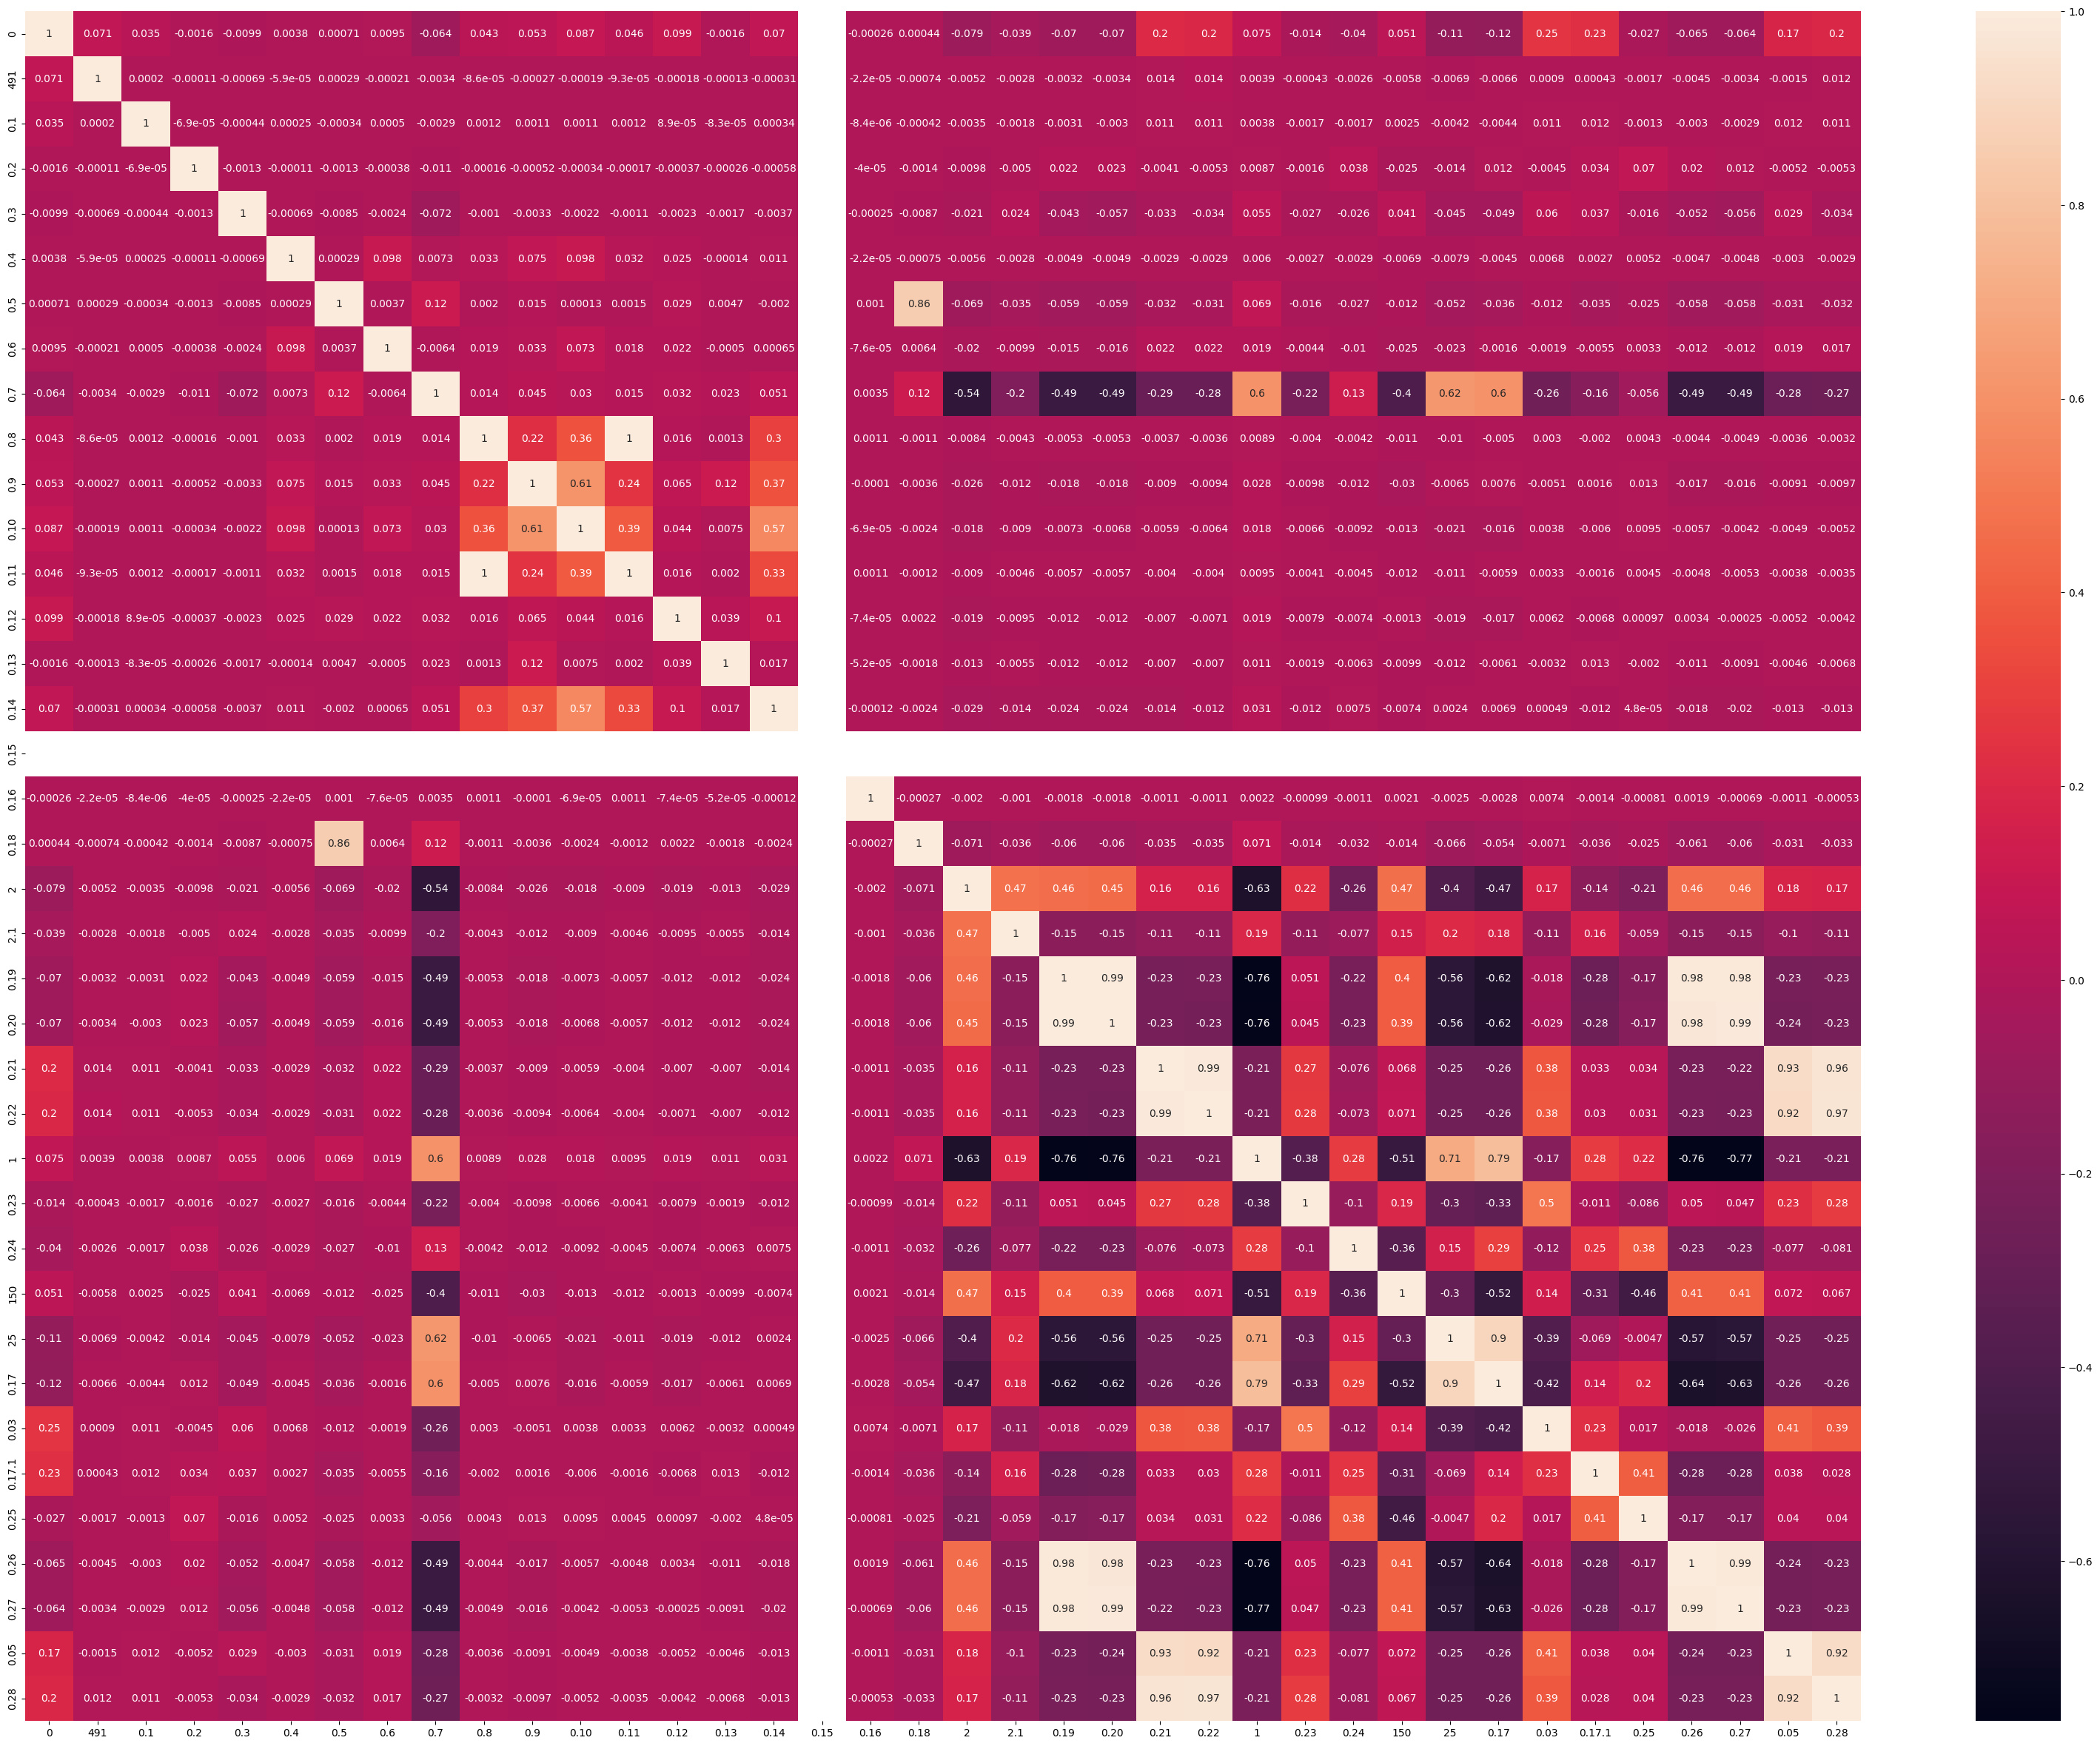

In [10]:
plt.figure(figsize=(40,30))
sns.heatmap(train.corr(), annot=True)

# import plotly.express as px
# fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
# fig.show()

In [11]:
print(train['normal'].unique())

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


# Label Encoding

In [12]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [13]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,11
1,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,9
2,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,11
3,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11
4,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,9


# Feature selection

In [14]:
X_train = train.drop(['normal'], axis=1)
Y_train = train['normal']

In [15]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['tcp', 'SF', '491', '2', '1', '0.23', '0.17', '0.03', '0.26', '0.27']

In [16]:
X_train = X_train[selected_features]

# Split and scale data

In [17]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

# K Nearest Neighbors (KNN) classification model

In [19]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [20]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, values=[0.9819538526672311], datetime_start=datetime.datetime(2022, 9, 14, 16, 11, 29, 554270), datetime_complete=datetime.datetime(2022, 9, 14, 16, 11, 38, 598440), params={'KNN_n_neighbors': 6}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)


In [21]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9846110229076889
Test Score: 0.9819538526672311


# Random Forest Classifier

In [22]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [23]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

FrozenTrial(number=25, values=[0.9895215918712955], datetime_start=datetime.datetime(2022, 9, 14, 16, 12, 48, 992409), datetime_complete=datetime.datetime(2022, 9, 14, 16, 12, 50, 358214), params={'rf_max_depth': 27, 'rf_max_features': 4, 'rf_n_estimators': 15}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=25, state=TrialState.COMPLETE, value=None)


In [24]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 0.991222499432978
Test Score: 0.9891511430990686


# SVM Model

In [26]:
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
degree_grid = np.arange(2, 6)

### Linear Kernel

In [28]:
parameters = {'C': C_grid}

gridCV = RandomizedSearchCV(SVC(kernel='linear'), parameters, n_jobs=-1, n_iter=10)             
gridCV.fit(x_train, y_train)

best_C = gridCV.best_params_['C']

print(f"Best C: {best_C}")

Best C: 0.36


In [29]:
SVM_linear = SVC(kernel='linear', C=best_C)
SVM_linear.fit(x_train, y_train)

SVC(C=0.36, kernel='linear')

In [30]:
SVM_linear_train, SVM_linear_test = SVM_linear.score(x_train , y_train), SVM_linear.score(x_test , y_test)

print(f"Training Score: {SVM_linear_train}")
print(f"Test Score: {SVM_linear_test}")

Training Score: 0.9489226581991381
Test Score: 0.9499629551227773


### RBF Kernel

In [31]:
parameters = {'C': C_grid, 'gamma' : gamma_grid}

gridCV = RandomizedSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1, n_iter=10)             
gridCV.fit(x_train, y_train)

best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

print(f"Best C: {best_C}, Best Gamma: {best_gamma}")

Best C: 0.26, Best Gamma: 0.9400000000000001


In [32]:
SVM_rbf = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
SVM_rbf.fit(x_train, y_train)

SVC(C=0.26, gamma=0.9400000000000001)

In [33]:
SVM_rbf_train, SVM_rbf_test = SVM_rbf.score(x_train , y_train), SVM_rbf.score(x_test , y_test)

print(f"Training Score: {SVM_rbf_train}")
print(f"Test Score: {SVM_rbf_test}")

Training Score: 0.9646064867316851
Test Score: 0.9641987722269263


# Poly Kernel

In [34]:
parameters = {'degree' : degree_grid}

gridCV = GridSearchCV(SVC(kernel='poly', C=best_C), parameters, n_jobs=-1)             
gridCV.fit(x_train, y_train)

best_degree = gridCV.best_params_['degree']

print(f"Best Degree: {best_degree}")

Best Degree: 4


In [35]:
SVM_poly = SVC(kernel='poly', C=best_C, degree=best_degree)
SVM_poly.fit(x_train, y_train)

SVC(C=0.26, degree=4, kernel='poly')

In [36]:
SVM_poly_train, SVM_poly_test = SVM_poly.score(x_train , y_train), SVM_poly.score(x_test , y_test)

print(f"Training Score: {SVM_poly_train}")
print(f"Test Score: {SVM_poly_test}")

Training Score: 0.9613177591290543
Test Score: 0.9609705757832345


### Linear SVC

In [37]:
SVM_linearSVC = LinearSVC(C=best_C)
SVM_linearSVC.fit(x_train, y_train)

LinearSVC(C=0.26)

In [38]:
SVM_linearSVC_train, SVM_linearSVC_test = SVM_linearSVC.score(x_train , y_train), SVM_linearSVC.score(x_test , y_test)

print(f"Training Score: {SVM_linearSVC_train}")
print(f"Test Score: {SVM_linearSVC_test}")

Training Score: 0.9376842821501474
Test Score: 0.9369443268416596


# Summary

In [39]:
data = [["KNN", KNN_train, KNN_test], 
        ["Random Forest", rf_train, rf_test], 
        ["SVM - Linear Kernel", SVM_linear_train, SVM_linear_test], 
        ["SVC - RBF Kernel", SVM_rbf_train, SVM_rbf_test], 
        ["SVC - Poly Kernel", SVM_poly_train, SVM_poly_test], 
        ["LinearSVC", SVM_linearSVC_train, SVM_linearSVC_test], 
        
        ]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.984611 │     0.981954 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      0.991222 │     0.989151 │
├─────────────────────┼───────────────┼──────────────┤
│ SVM - Linear Kernel │      0.948923 │     0.949963 │
├─────────────────────┼───────────────┼──────────────┤
│ SVC - RBF Kernel    │      0.964606 │     0.964199 │
├─────────────────────┼───────────────┼──────────────┤
│ SVC - Poly Kernel   │      0.961318 │     0.960971 │
├─────────────────────┼───────────────┼──────────────┤
│ LinearSVC           │      0.937684 │     0.936944 │
╘═════════════════════╧═══════════════╧══════════════╛
